# Exercise Sheet 3

In this exercise we perform character recognition using SVM and NN classifiers. We use the MNIST dataset, which consists of 70000 handwritten digits 0..9 at a resolution of 28x28 pixels. 

Stuff we need:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sklearn as skl
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

Now we get the MNIST data. Using the fetch_mldata function, this will be downloaded from the web, and stored in the directory you specify as data_home (replace my path in the following cell):

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', data_home='/home/kenneth/Data')

The data has .data and .target attributes. The following gives us some basic information on the data:

In [9]:
print("Number of datapoints: {}\n".format(mnist.data.shape[0]))
print("Number of features: {}\n".format(mnist.data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist.target)))

Number of datapoints: 70000

Number of features: 784

List of labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



The mnist.data is represented as a Pandas dataframe. The following code expects mnist.data to be a plain np.array, which we get simply by running:

In [10]:
mnist.data=np.array(mnist.data)

We can plot individual datapoints as follows:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148
  55   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  87 232 252 253 189 

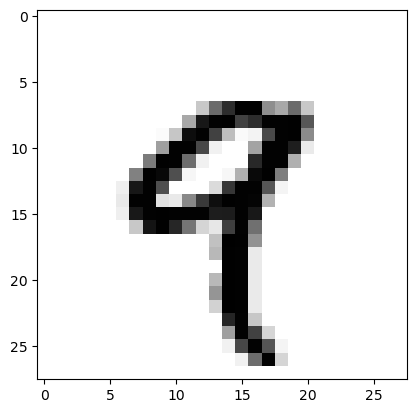

In [ ]:
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist.data[index,:]))
print("Target of datapoint no. {}:\n{}\n".format(index,mnist.target[index])) ## Added the target value of index 4
print("As image:\n")
plt.imshow(mnist.data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

To make things a little bit simpler (and faster!), we can extract from the data binary subsets, that only contain the data for two selected digits:

The first datapoint now is: 



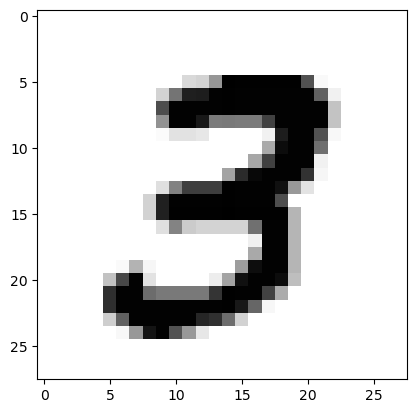

7        3
10       3
12       3
15       7
27       3
        ..
69975    3
69979    7
69986    3
69990    7
69996    3
Name: class, Length: 14434, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [12]:
digit0='3'
digit1='7'
mnist_bin_data=mnist.data[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
mnist_bin_target=mnist.target[np.logical_or(mnist.target==digit0,mnist.target==digit1)]
print("The first datapoint now is: \n")
plt.imshow(mnist_bin_data[0].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()
print(mnist_bin_target)

**Exercise 1:** Split the mnist_bin data into training and test set. Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN). For each configuration, determine the time it takes to learn the model, and the accuracy on the test data. *Caution*: for some configurations, learning here can take a little while (several minutes).

Using the numpy where() function, one can extract the indices of the test cases that were misclassified: <br>
`misclass = np.where(test != predictions)` <br>
Inspect some misclassified cases. Do they correspond to hard to recognize digits (also for the human reader)? 

How do results (time and accuracy) change, depending on whether you consider an 'easy' binary task (e.g., distinguishing '1' and '0'), or a more difficult one (e.g., '4' vs. '5'). 

Identify one or several good configurations that give a reasonable combination of accuracy and runtime. Use these configurations to perform a full classification of the 10 classes in the original dataset (after split into train/test). Using `sklearn.metrics.confusion_matrix` you can get an overview of all combinations of true and predicted labels (see p. 298-299 in Müller & Guido). What does this tell you about which digits are easy, and which ones are difficult to recognize, and which ones are most easily confused?

In [ ]:
## Split the mnist_bin data into training and test set. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist_bin_data, mnist_bin_target, random_state=1) # test size 25% and training 75%

In [ ]:
## Learn different SVM and NN models by varying the kernel functions (SVM), the network structure (NN), and the solver (NN)
import time

kernel_type = 'linear'
start=time.time()
linear_svm = SVC(kernel=kernel_type).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = linear_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = linear_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Time it took to learn the linear kernel model: 12.40 seconds
Training Accuracy: 1.00
Test Accuracy: 0.98


In [26]:
import time

kernel_type = 'rbf'
start=time.time()
kernel_svm = SVC(kernel=kernel_type, gamma=1.0).fit(X_train,y_train)
end=time.time()
elapsed_time=end-start 
print(f"Time it took to learn the {kernel_type} kernel model: {elapsed_time:.2f} seconds")

# Calculate accuracy on training data
train_accuracy = kernel_svm.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate accuracy on test data
test_accuracy = kernel_svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Time it took to learn the linear kernel model: 475.93 seconds
Training Accuracy: 1.00
Test Accuracy: 0.51


We next investigate the capability of the different learning approaches to find a good model, when we know that a very accurate model exists. For this, we add a 'cheat column' to our data: we add an additional column to the data matrix that simply contains a 0/1 encoding of the actual class label: 

In [ ]:
cheatcol=np.array(mnist_bin_target) #making a copy of the original target array
cheatcol[cheatcol==digit0]=0  #re-coding the two classes as 0s and 1s
cheatcol[cheatcol==digit1]=1

# The type of the target array is originally 'object' (the values '0','1',...,'9' are seen as categorical labels,
# not as numbers). We now want to use the 0's and 1's as numbers: 
cheatcol=cheatcol.astype(float)

cheatcol=np.reshape(cheatcol,[mnist_bin_data.shape[0],1]) #getting the dimensions right for the following .hstack operation to work ... 
mnist_bin_data_cheat = np.hstack((mnist_bin_data,cheatcol)) #appending the new column

All our candidate model types now are able, in principle, to construct a 100% accurate classifier for this data: we only have to 'learn' that only the last column in the data matters, and we can predict 'digit0' if we find a 0 in the last column and 'digit1' if we find a 1. All our SVM or NN network models would in principle be able to do just this, through a suitable setting of the SVM coefficients, respectively the NN weights.

**Exercise 2:** 

**a** Describe, briefly, how the coefficients and weights of an SVM and NN model (with a suitably chosen number of layers) would have to be set, so that the resulting model is 100% accurate on this cheating data. Only consider the accuracy of the SVM or NN classifier defined by the coefficients/weights. You need not take into account that the SVM satisfies the max-margin objective, or that the NN minimizes its error function. This part of the exercise does not involve any Python code. Just give your answer in a short text.

**b** Investigate how the accuracy of different SVM and NN classifiers improves in practice on this new dataset. Do you achieve 100% accuracy on the test set? If not, try to change the encoding in the cheat column: instead of representing digit1 with a 1, use a larger number, e.g. 250. Does that help? Why? This part of the exercise is in Python!

**Exercise 3:** (Now back to the data without a cheating column!) Suppose you want to design a custom kernel function for the MNIST data that better captures the relevant properties of 'similarity' in this data than the generic 'rbf' or 'poly' kernels. Bear in mind that the data as seen by our classifiers and kernel functions just consists of arrays of length 784. 

Describe one or two ideas for defining such a kernel. You need not show that the kernel you propose actually is positive semi-definite (though as a bonus, you can try to provide some arguments for that). This is a text-only exercise -- no sklearn code required!

If you are really curious, you can implement your kernel as a function, and use it as a custom kernel. See http://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py for an example of how that is done.